# Lending Club Dataset Exploration 

Author: Sashank Parigi | December 2017
Email: sashankvparigi@gmail.com

As the P2P Lending sphere develops, a unique opportunity for economic analysis is presented. Many of these platforms are as transparent as possible to encourage investors to utilize public data and develop strategies. For Lending Club in particular, almost every single loan processed through their standard program is cleansed of identifying information and published to their site. For now, the dataset is mostly useful for investors in either Lending Club loans or Lending Club's equity, but eventually, the combined datasets of P2P lenders could provide an interesting look at consumer credit details. Currently, macro factors are likely influences on demand for P2P loans, but maybe one day P2P loan demand itself could be a macro factor. In the project, I'll be identifying some characteristics of the dataset that will help put the space in context.

In [106]:
%matplotlib inline

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
import matplotlib
import numpy as np
from pandas.stats.api import ols


# Importing and Cleaning Data
The data I used came from https://www.lendingclub.com/info/download-data.action. I downloaded the quarterly zips and used the extracted files to simplify importing. Only accepted loans are included in this dataset, so most of the entries have a healthy amount of data reported. 

State population data is from a recent census and macroeconomic data is from FRED. 

In [107]:
def readZIPFiles(path2):
    path1 = '/Users/sashankparigi/Desktop/Data_Bootcamp/Lending Club/'
    df = pd.read_csv(path1 + path2, header=0,low_memory = False, encoding = "ISO-8859-1")
    return df;

def PullLoanDF(month,count):
    #This function is used for tracking the purpose of each loan in each month of data
    g = df_full[df_full['issue_d'] == month]
    a = g[g['title'] == 'Debt consolidation'].count()['title']
    b = g[g['title'] == 'Credit card refinancing'].count()['title']
    c = g[g['title'] == 'Home improvement'].count()['title']
    d = g[g['title'] == 'Business'].count()['title']
    e = g[g['title'] == 'Medical expenses'].count()['title']
    f = g[g['title'] == 'Major purchase'].count()['title']
    g = g[g['title'] == 'Other'].count()['title']
    total = a+b+c+d+e+f+g
    df_monthly2.set_value(count,'Date',month)
    df_monthly2.set_value(count,'Debt',a)
    df_monthly2.set_value(count,'Credit Card',b)
    df_monthly2.set_value(count,'Home Improvement',c)
    df_monthly2.set_value(count,'Business',d)
    df_monthly2.set_value(count,'Medical Expenses',e) 
    df_monthly2.set_value(count,'Major Purchase',f);                                        
    df_monthly2.set_value(count,'Other',g);

def PullLoanDF2(month,count):
    #Similar function as above, but returns percentages instead of full loan counts. 
    #In retrospect, I should have just added a boolean to the first...
    g = df_full[df_full['issue_d'] == month]
    a = g[g['title'] == 'Debt consolidation'].count()['title']
    b = g[g['title'] == 'Credit card refinancing'].count()['title']
    c = g[g['title'] == 'Home improvement'].count()['title']
    d = g[g['title'] == 'Business'].count()['title']
    e = g[g['title'] == 'Medical expenses'].count()['title']
    f = g[g['title'] == 'Major purchase'].count()['title']
    g = g[g['title'] == 'Other'].count()['title']
    total = a+b+c+d+e+f+g
    df_monthly3.set_value(count,'Date',month)
    df_monthly3.set_value(count,'Debt',a/total)
    df_monthly3.set_value(count,'Credit Card',b/total)
    df_monthly3.set_value(count,'Home Improvement',c/total)
    df_monthly3.set_value(count,'Business',d/total)
    df_monthly3.set_value(count,'Medical Expenses',e/total) 
    df_monthly3.set_value(count,'Major Purchase',f/total);                                        
    df_monthly3.set_value(count,'Other',g/total);
    
#Calling function to read in each quarterly file
path2 = 'LoanStats_2016Q1.csv'
df_2016Q1 = readZIPFiles(path2)
path2 = 'LoanStats_2016Q2.csv'
df_2016Q2 = readZIPFiles(path2)
path2 = 'LoanStats_2016Q3.csv'
df_2016Q3 = readZIPFiles(path2)
path2 = 'LoanStats_2016Q4.csv'
df_2016Q4 = readZIPFiles(path2)
path2 = 'LoanStats_2017Q1.csv'
df_2017Q1 = readZIPFiles(path2)
path2 = 'LoanStats_2017Q2.csv'
df_2017Q2 = readZIPFiles(path2)
path2 = 'LoanStats_2017Q3.csv'
df_2017Q3 = readZIPFiles(path2)

#Combining all the quarterly files into one dataset, makes it easier to split back into months later
frames = [df_2016Q1,df_2016Q2,df_2016Q3,df_2016Q4,df_2017Q1,df_2017Q2,df_2017Q3]
df_full = pd.concat(frames)

In [108]:
#Builds new dataframe for Loan purpose breakdowns
columns_monthly2 = ['Date','Debt','Credit Card','Home Improvement','Business','Medical Expenses','Major Purchase','Other']
df_monthly2 = pd.DataFrame(columns=columns_monthly2)

#Runs previously defined fucntion for every month
months = ["Jan-16","Feb-16","Mar-16","Apr-16","May-16","Jun-16","Jul-16","Aug-16","Sep-16","Oct-16","Nov-16","Dec-16","Jan-17","Feb-17","Mar-17","Apr-17","May-17","Jun-17","Jul-17","Aug-17","Sep-17"]
count = 1
for month in months:
    PullLoanDF(month,count)
    count = count + 1

df_monthly2

,Date,Debt,Credit Card,Home Improvement,Business,Medical Expenses,Major Purchase,Other
1,Jan-16,17028,7639,1732,307,329,561,1514
2,Feb-16,20763,8778,2244,347,411,778,1853
3,Mar-16,32646,12874,4114,637,636,1398,3463
4,Apr-16,18603,7139,2567,366,390,853,2494
5,May-16,14819,5383,2107,343,346,672,1802
6,Jun-16,16956,6126,2748,336,454,920,2232
7,Jul-16,19163,6126,2486,335,410,799,2432
8,Aug-16,19552,6572,2427,340,373,859,2528
9,Sep-16,15284,5018,2066,325,391,721,2044
10,Oct-16,18902,6308,2508,363,475,781,2325


To interpret results better, I build a pie chart using cumulative data for the entire time period.

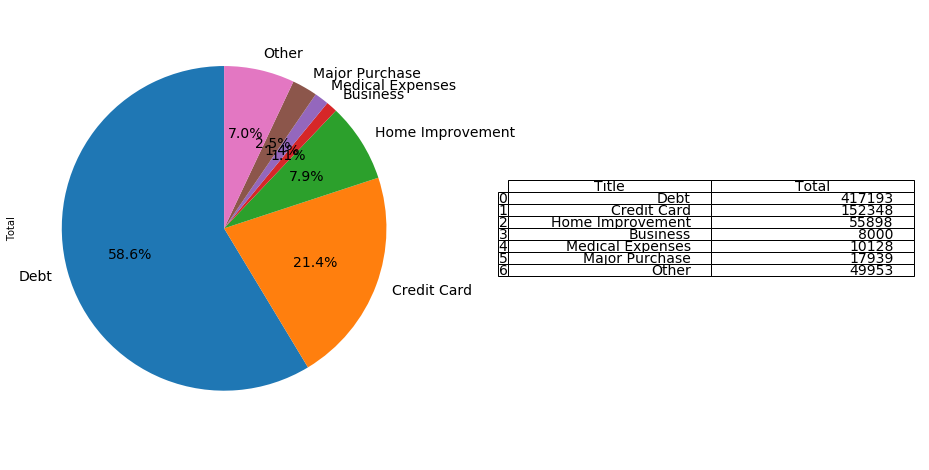

In [109]:
rows_plot = ['Debt','Credit Card','Home Improvement','Business','Medical Expenses','Major Purchase','Other']
columns_plot = ['Title','Total']
raw_data = {'Title': ['Debt','Credit Card','Home Improvement','Business','Medical Expenses','Major Purchase','Other'],
        'Total': [0,0,0,0,0,0,0]}


df_plot = pd.DataFrame(raw_data,columns=columns_plot)
df_plot.index.name = "index"

#Plugs cumulative numbers for each category into a new dataframe
count = 0
for row in rows_plot:
    sum1 = df_monthly2.sum()[row] 
    df_plot.set_value(count,'Total',sum1)
    count = count + 1

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_plot.plot(kind='pie', y = 'Total', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_plot['Title'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df_plot, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

The pie chart above shows a clear preference in uses for the loans. Credit card refinancing and debt consolidation are the favorites, but other uses still make up a solid 20% of the loans. The credit card and debt consolidation categories could effectively be put together as they are driven by similar motivations. High interest rates and debts spread out across multiple cards make lending club an attractive choice for someone looking to simplify their finances. 

To see how this split has been changing over time, I construct line charts below.

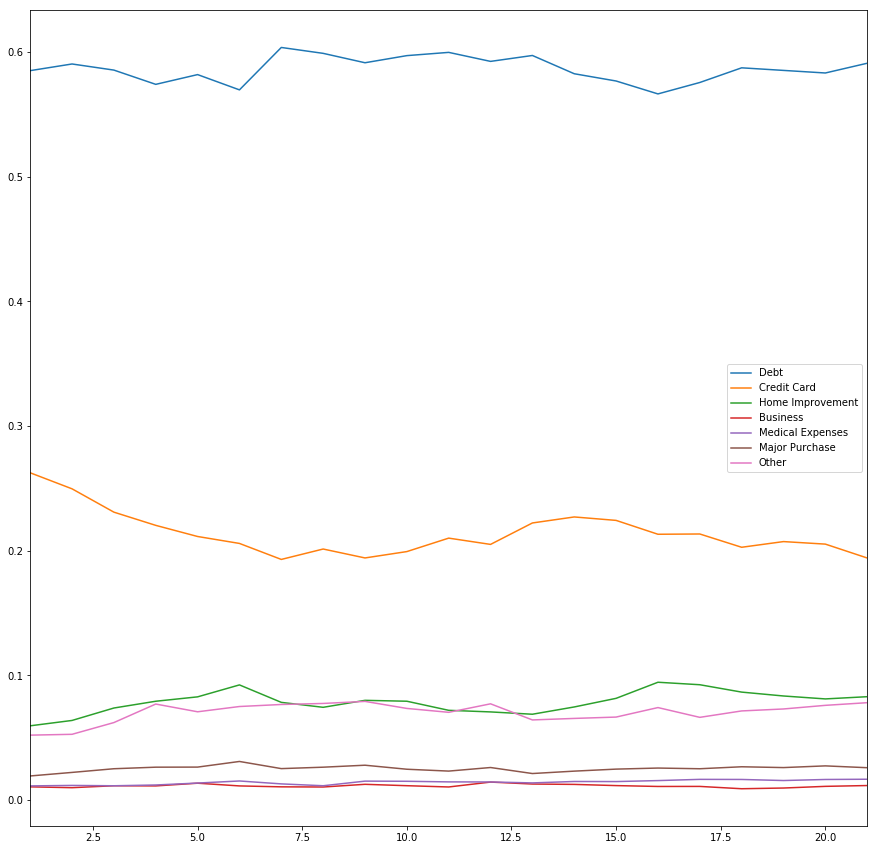

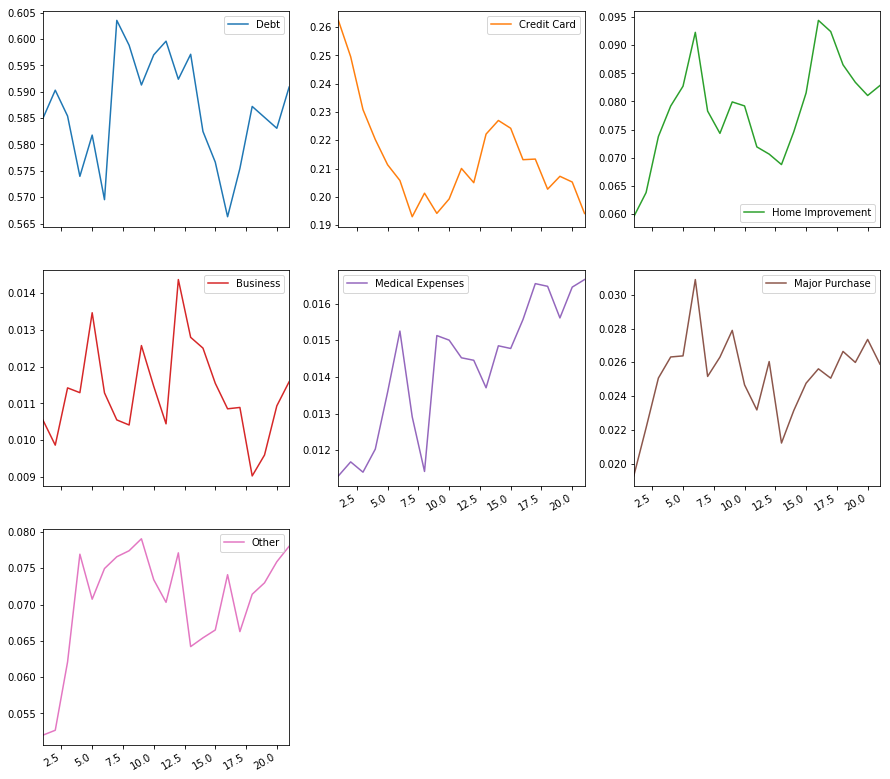

In [110]:
#Create new dataframe to hold category percentages over time 
df_monthly3 = pd.DataFrame(columns=columns_monthly2)

count = 1
for month in months:
    PullLoanDF2(month,count)
    count = count + 1
#full plot
df_monthly3.plot(figsize =(15,15))
#sub plots
df_monthly3.plot(subplots=True, layout = (3,3), figsize = (15,15));

As evidenced in the first full chart, the relative strength of each category has remained unchanged since the beginning of 2016. However, looking at the individual sub plots, there are still some interesting trends. Credit card refinancing has fallen from 26% to 20%. Meanwhile, all the "consumer spending" uses of loans have picked up. Perhaps customers initially treated Lending Club as primarily a vehicle for getting a better deal on credit cards and after success with that, they began to get comfortable using lending club for day-to-day purposes. From lending club's perspective, diversification is great for business. From the perspective of macroeconomists, more diversification in use means the dataset is becoming more useful for understanding consumer behavior. 

Next, I want to look at income and debt levels of the people taking out these loans to get a better sense of the audience. 

In [111]:
def PopulateMonthlyDF(month,count):
    g = df_full[df_full['issue_d'] == month]
    loan_sum = g['loan_amnt'].sum() 
    average_income = g['annual_inc'].sum()
    average_incomec = g['annual_inc'].count()
    average_debt = g['tot_cur_bal'].sum()
    average_debtc = g['tot_cur_bal'].count()
    df_monthly.set_value(count,'Date',month)
    df_monthly.set_value(count,'Total Loans',loan_sum)
    df_monthly.set_value(count,'Average Income',average_income/average_incomec)
    df_monthly.set_value(count,'Average Outstanding Debt',average_debt/average_debtc)
    df_monthly.set_value(count,'Coverage Ratio',(average_income/average_incomec)/(average_debt/average_debtc));
    
columns_monthly = ['Date','Average Income','Average Outstanding Debt','Total Loans','Coverage Ratio']
df_monthly = pd.DataFrame(columns=columns_monthly)

months = ["Jan-16","Feb-16","Mar-16","Apr-16","May-16","Jun-16","Jul-16","Aug-16","Sep-16","Oct-16","Nov-16","Dec-16","Jan-17","Feb-17","Mar-17","Apr-17","May-17","Jun-17","Jul-17","Aug-17","Sep-17"]
count = 0

for month in months:
    PopulateMonthlyDF(month,count)
    count = count + 1

df_monthly

,Date,Average Income,Average Outstanding Debt,Total Loans,Coverage Ratio
0,Jan-16,84302.4,154088,5.18403e+08,0.547107
1,Feb-16,81079.4,147266,6.19446e+08,0.550562
2,Mar-16,78067.5,143648,9.49368e+08,0.543466
3,Apr-16,77626,141035,5.37278e+08,0.550401
4,May-16,76068.4,136753,4.17539e+08,0.556247
5,Jun-16,79741.8,145812,4.88624e+08,0.546882
6,Jul-16,76609.5,134929,4.88021e+08,0.567778
7,Aug-16,79134.6,139352,5.17054e+08,0.567875
8,Sep-16,79973.2,143021,3.99512e+08,0.55917
9,Oct-16,81153.7,147251,4.64761e+08,0.551125


It might not be obvious from the output, but these Americans in the lending club dataset have very healthy finances. The average American is making an income of 55,000 with a total debt of 205,000. This translates to a coverage ratio about half as strong as that of Lending Club's customers. 

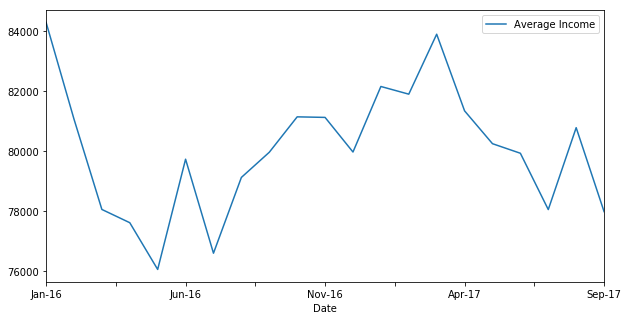

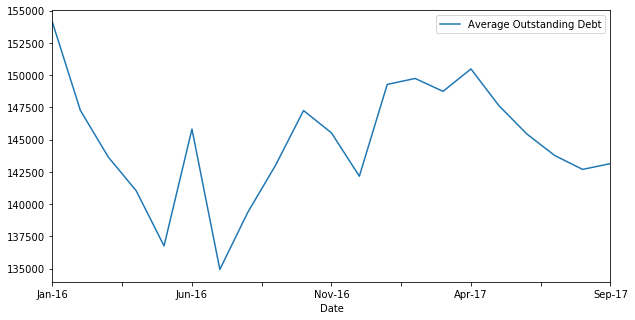

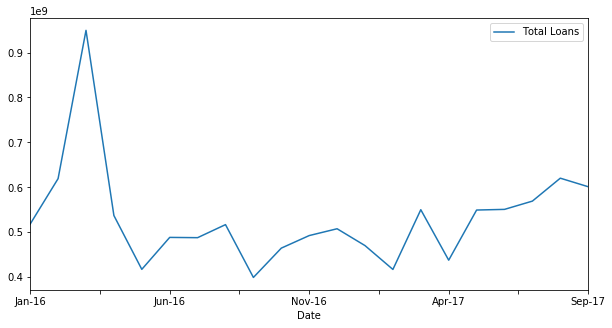

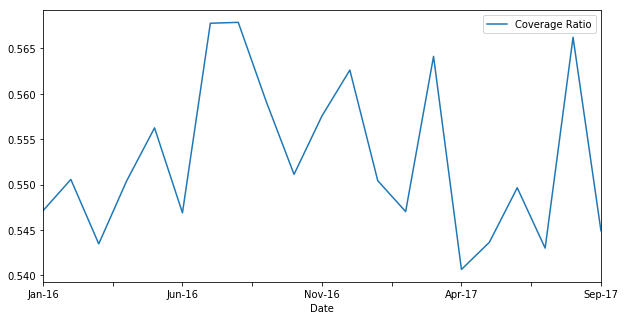

In [112]:
df_monthly.plot(x = 'Date',y = 'Average Income', figsize = (10,5))
df_monthly.plot(x = 'Date',y = 'Average Outstanding Debt', figsize = (10,5))
df_monthly.plot(x = 'Date',y = 'Total Loans', figsize = (10,5))
df_monthly.plot(x = 'Date',y = 'Coverage Ratio', figsize = (10,5))

The time series of these metrics show that average income and average outstanding debt have fallen slightly, but total originations (a proxy for overall demand) and coverage ratio have fluctuated around a mean during this period. 

Next, I want to see if there are any geographic patterns with demand for lending club loans. 

In [113]:
# Geographic Density of Loans

#Pulls the number of loans made in each state for the entire time period
def pullStateLoans(state,count):
    g = df_full[df_full['addr_state'] == state]
    loans = g['addr_state'].count()
    df_pops.set_value(count,'Loan Count',loans);
    
#Link provides population data in order to get a per capita figure that can be compared across states
df_pops = pd.read_csv('http://www.101computing.net/wp/wp-content/uploads/US-States.txt',header = -1)
df_pops.columns = ['State','Abr','Population']
df_pops['Loan Count']=""
df_pops['Loans per Capita']=""
#df_pops = df_pops.set_index('Abr')



states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA","DC", "WV", "WI", "WY"]
count = 0
for state in states:
    pullStateLoans(state, count)
    count = count+1
    
df_pops['Loans per Capita'] = df_pops['Loan Count']/df_pops['Population']

In [114]:
df_pops.sort_values('Loans per Capita',ascending = False)

,State,Abr,Population,Loan Count,Loans per Capita
27,Nevada,NV,1998257,10875,0.00544224
5,Colorado,CO,4301261,15641,0.00363638
6,Connecticut,CT,3405565,12317,0.00361673
2,Arizona,AZ,5130632,18251,0.00355726
8,Florida,FL,15982378,54773,0.00342709
19,Maryland,MD,5296486,18078,0.00341321
31,New York,NY,18976457,62974,0.00331853
29,New Jersey,NJ,8414350,27830,0.00330745
38,Rhode Island,RI,1048319,3369,0.00321372
50,Wyoming,WY,493782,1538,0.00311473


Nevada, Arizona, and Florida stand out as three states whose housing markets were disproportionately hit during the housing crisis. Therefore, it makes sense that people in these states would have the worst debt situations and be most upon to considering new alternatives like P2P lending. The bottom few states tend to be more southern/midwestern. Iowa is the one state where P2P lending is still not legal. 

Next, I want to see if macro factors have any relationship with overall originations by building a regression. 

In [115]:
path2 = 'UNRATE.csv'
df_UNRATE = readZIPFiles(path2)
path2 = 'REVOLSL.csv'
df_REVOLSL = readZIPFiles(path2)
path2 = 'FEDFUNDS.csv'
df_FEDFUNDS = readZIPFiles(path2)


df_macro = pd.concat([df_monthly, df_UNRATE], axis=1)
df_macro = df_macro.drop('DATE', 1)
df_macro = pd.concat([df_macro, df_REVOLSL], axis=1)
df_macro = df_macro.drop('DATE', 1)
df_macro = pd.concat([df_macro, df_FEDFUNDS], axis=1)
df_macro = df_macro.drop('DATE', 1)


df_macro=df_macro.drop(df_macro.index[len(df_macro)-1])
df_macro=df_macro.drop(df_macro.index[len(df_macro)-1])


#Change in outstanding consumer credit is more relevant than the total amount 
df_macro['Delta REVOLSL'] = df_macro['REVOLSL'].diff()
df_macro


,Date,Average Income,Average Outstanding Debt,Total Loans,Coverage Ratio,UNRATE,REVOLSL,FEDFUNDS,Delta REVOLSL
0,Jan-16,84302.4,154088,5.18403e+08,0.547107,4.9,911.7307,0.34,NaN
1,Feb-16,81079.4,147266,6.19446e+08,0.550562,4.9,913.6404,0.38,1.9097
2,Mar-16,78067.5,143648,9.49368e+08,0.543466,5.0,924.8057,0.36,11.1653
3,Apr-16,77626,141035,5.37278e+08,0.550401,5.0,927.3958,0.37,2.5901
4,May-16,76068.4,136753,4.17539e+08,0.556247,4.7,931.6313,0.37,4.2355
5,Jun-16,79741.8,145812,4.88624e+08,0.546882,4.9,939.5301,0.38,7.8988
6,Jul-16,76609.5,134929,4.88021e+08,0.567778,4.9,942.6965,0.39,3.1664
7,Aug-16,79134.6,139352,5.17054e+08,0.567875,4.9,948.3063,0.40,5.6098
8,Sep-16,79973.2,143021,3.99512e+08,0.55917,4.9,952.2508,0.40,3.9445
9,Oct-16,81153.7,147251,4.64761e+08,0.551125,4.8,955.3078,0.40,3.0570


In [116]:
result = ols(y=df_macro['Total Loans'], x=df_macro[['UNRATE','FEDFUNDS','Delta REVOLSL']])
print(result)


/Users/sashankparigi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <UNRATE> + <FEDFUNDS> + <Delta REVOLSL> + <intercept>

Number of Observations:         20
Number of Degrees of Freedom:   4

R-squared:         0.4206
Adj R-squared:     0.3120

Rmse:          97780319.8496

F-stat (3, 16):     3.8718, p-value:     0.0295

Degrees of Freedom: model 3, resid 16

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        UNRATE 542033181.8250 222297237.8232       2.44     0.0268 106330595.6915 977735767.9586
      FEDFUNDS 504178678.7052 191888751.8865       2.63     0.0183 128076725.0076 880280632.4028
 Delta REVOLSL 22384869.9245 7567972.1367       2.96     0.0093 7551644.5366 37218095.3124
     intercept -2421418556.4662 1162487388.7300      -2.08     0.0537 -469989383

According to the regression, all three of the factors are significant at a 5% level in predicting total originations. As unemployment goes up, credit refinancing becomes more important as more debt goes bad and marginal savings on interest payments matter more. As interest rates go up, credit card interest rates go up faster than lending club's, making incentive to refinance stronger. Finally, an increase in overall consumer credit is also a positive influence on lending club loan demand. However, more data and factors would be necessary to draw concrete conclusions from this regression. The January 2016 to September 2017 period is effectively the same macro environment, so the results would gain significance if they held true throughout different stages of the business cycle. 

# Conclusion

To summarize, the lending club dataset reveals that the bulk of loans are still concentrated in debt consolidation and credit card refinancing. However, there is a noticeable trend in more consumption-oriented loans. The average lending club customer has a far healthier debt and income profile than the average American, meaning that it is not yet as reflective of general American consumption trends as it could be. Geaographic breakdowns show that states that were hit hardest in the housing crisis have a particular demand for P2P lending. Finally, the regression output shows that Change in Consumer Credit, Unemployment, and interest rates all have a significant impact on demand for loans.